In [2]:
import numpy as np 
import time 
import matplotlib.pyplot as plt
import math


In [3]:
# ---------------------------------------------------------
#    y_{n+1} = y_n + h * φ(x_n, y_n, h)
# ---------------------------------------------------------

def solveur_general(phi, f, x0, y0, h, n):
    x = x0
    y = float(y0)

    xs = np.empty(n + 1)
    ys = np.empty(n + 1)
    xs[0], ys[0] = x, y

    for i in range(1, n + 1):
        phi_val = phi(x, y, h, f)
        y = y + h * phi_val
        x = x + h
        xs[i], ys[i] = x, y

    return xs, ys


In [4]:
# ---------------------------------------------------------
#  Méthodes numériques
# ---------------------------------------------------------

def phi_euler(x, y, h, f):
    return f(x, y)

def phi_heun(x, y, h, f):
    k1 = f(x, y)
    return f(x + 0.5*h, y + 0.5*h*k1)

def phi_rk4(x, y, h, f):
    k1 = f(x, y)
    k2 = f(x + 0.5*h, y + 0.5*h*k1)
    k3 = f(x + 0.5*h, y + 0.5*h*k2)
    k4 = f(x + h, y + h*k3)
    return (k1 + 2*k2 + 2*k3 + k4) / 6


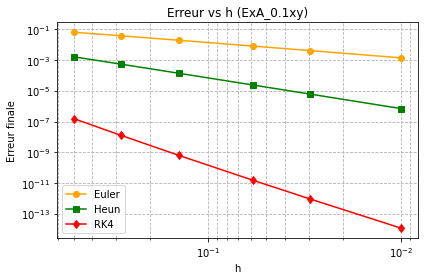

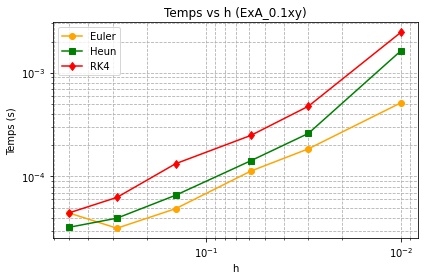

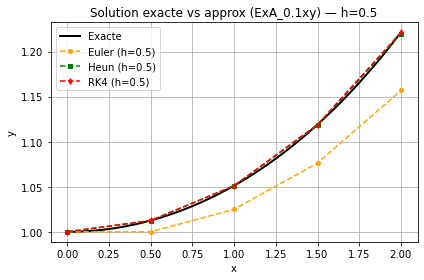

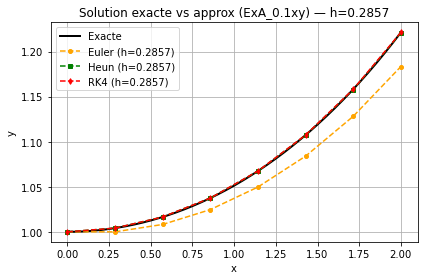

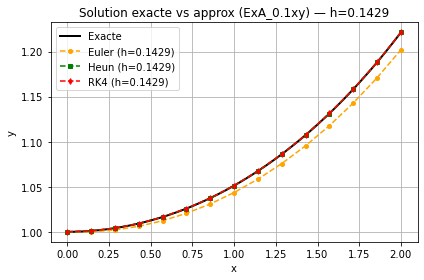

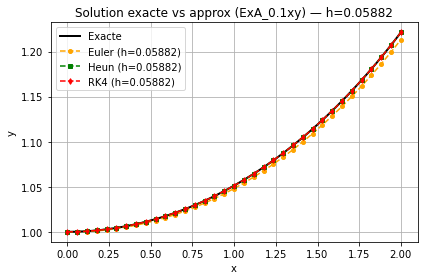

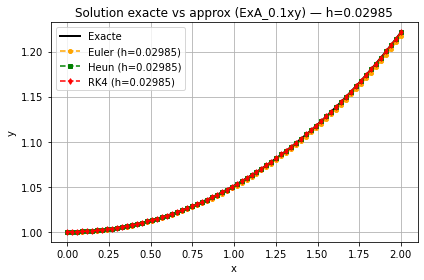

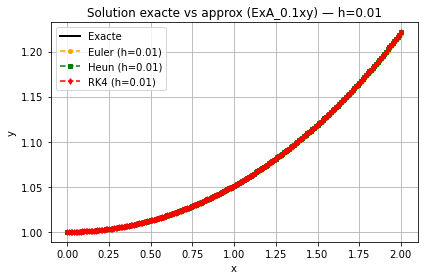

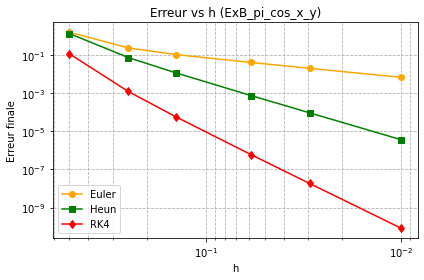

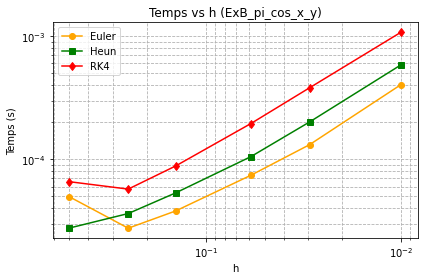

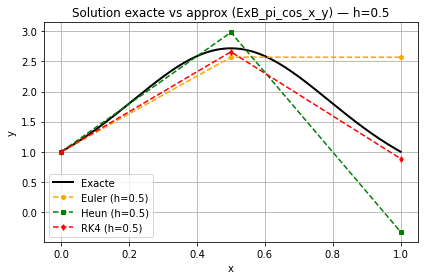

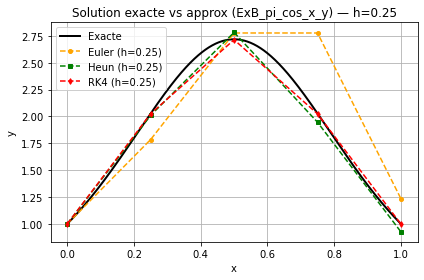

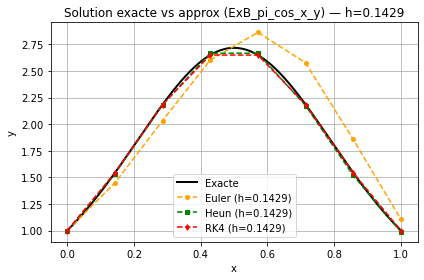

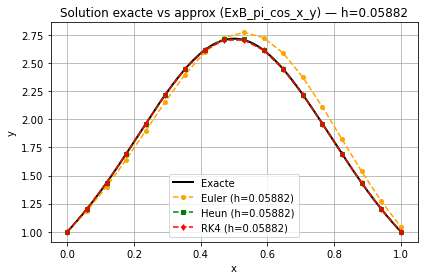

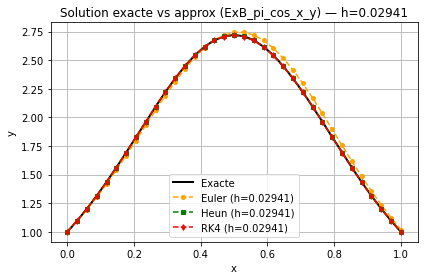

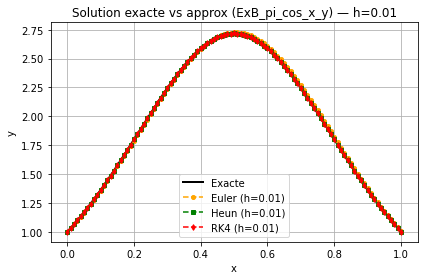

In [5]:
methods = [
    ("Euler", phi_euler, "o"),
    ("Heun", phi_heun, "s"),
    ("RK4", phi_rk4, "d")
]


# ---------------------------------------------------------
#  Exemples
# ---------------------------------------------------------

def fA(x, y): 
    return 0.1 * x * y

def exactA(x): 
    return np.exp(0.05 * x**2)

x0A, y0A, XA = 0, 1, 2


def fB(x, y): 
    return math.pi * math.cos(math.pi * x) * y

def exactB(x): 
    return np.exp(np.sin(np.pi * x))

x0B, y0B, XB = 0, 1, 1


examples = [
    ("ExA_0.1xy", fA, exactA, x0A, y0A, XA),
    ("ExB_pi_cos_x_y", fB, exactB, x0B, y0B, XB),
]


# ---------------------------------------------------------
#  Pas h
# ---------------------------------------------------------

hs = [0.5, 0.3, 0.15, 0.06, 0.03, 0.01]


# ---------------------------------------------------------
#  Boucle d'expériences
# ---------------------------------------------------------

results = {}

for name, f, exact, x0, y0, X in examples:

 

    results[name] = {}

    for mname, phi, mark in methods:
        results[name][mname] = {"h":[], "err":[], "time":[], "nsteps":[]}

    for h in hs:

        nsteps = int(np.ceil((X - x0) / h))
        h_adj = (X - x0) / nsteps


        for mname, phi, mark in methods:

            t0 = time.perf_counter()
            xs, ys = solveur_general(phi, f, x0, y0, h_adj, nsteps)
            t1 = time.perf_counter()

            err = abs(ys[-1] - exact(X))

            results[name][mname]["h"].append(h_adj)
            results[name][mname]["err"].append(err)
            results[name][mname]["time"].append(t1 - t0)
            results[name][mname]["nsteps"].append(nsteps)

            # print(f"   {mname:<5s} : erreur = {err:.3e}")


# ---------------------------------------------------------
#  Affichage des courbes (sans sauvegarde)
# ---------------------------------------------------------

colors = ["black", "orange", "green", "red"]

for name, f, exact, x0, y0, X in examples:

    # -------- Courbes Erreur vs h --------
    plt.figure(figsize=(6,4))
    for (mname, phi, mark), col in zip(methods, colors[1:]):
        plt.loglog(results[name][mname]["h"], results[name][mname]["err"],
                   marker=mark, markersize=6, color=col, label=mname)
    plt.gca().invert_xaxis()
    plt.xlabel("h")
    plt.ylabel("Erreur finale")
    plt.title(f"Erreur vs h ({name})")
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -------- Courbes temps vs h --------
    plt.figure(figsize=(6,4))
    for (mname, phi, mark), col in zip(methods, colors[1:]):
        plt.loglog(results[name][mname]["h"], results[name][mname]["time"],
                   marker=mark, markersize=6, color=col, label=mname)
    plt.gca().invert_xaxis()
    plt.xlabel("h")
    plt.ylabel("Temps (s)")
    plt.title(f"Temps vs h ({name})")
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -------- Courbes solution exacte vs approximations --------
    for h_adj in hs:  
        nsteps = int(np.ceil((X - x0) / h_adj))
        h_adj = (X - x0)/nsteps

        plt.figure(figsize=(6,4))

        # Solution exacte
        x_true = np.linspace(x0, X, 600)
        y_true = exact(x_true)
        plt.plot(x_true, y_true, color="black", linewidth=2, label="Exacte")

        # Approximations
        for (mname, phi, mark), col in zip(methods, colors[1:]):
            xs, ys = solveur_general(phi, f, x0, y0, h_adj, nsteps)
            plt.plot(xs, ys, marker=mark, markersize=4,
                     linestyle='--', color=col,
                     label=f"{mname} (h={h_adj:.4g})")

        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"Solution exacte vs approx ({name}) — h={h_adj:.4g}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()